In [1]:
! gdown --id 1_-DZVz5AKqrxqpvh-s7Q3tKgirJhJzRn

Downloading...
From: https://drive.google.com/uc?id=1_-DZVz5AKqrxqpvh-s7Q3tKgirJhJzRn
To: /content/filter_new.zip
113MB [00:02, 53.3MB/s]


In [2]:
!pwd


/content


In [3]:
!ls -la --block-size=MB

total 113MB
drwxr-xr-x 1 root root   1MB Jun 22 08:38 .
drwxr-xr-x 1 root root   1MB Jun 22 08:37 ..
drwxr-xr-x 4 root root   1MB Jun 15 13:37 .config
-rw-r--r-- 1 root root 113MB Jun 22 08:38 filter_new.zip
drwxr-xr-x 1 root root   1MB Jun 15 13:37 sample_data


In [4]:
!unzip "/content/filter_new.zip"

Streaming output truncated to the last 5000 lines.
  inflating: filter/train_imgs_128/3/9395.png  
  inflating: filter/train_imgs_128/3/15827.png  
  inflating: filter/train_imgs_128/3/12190.png  
  inflating: filter/train_imgs_128/3/1911.png  
  inflating: filter/train_imgs_128/3/11499.png  
  inflating: filter/train_imgs_128/3/10793.png  
  inflating: filter/train_imgs_128/3/249.png  
  inflating: filter/train_imgs_128/3/15402.png  
  inflating: filter/train_imgs_128/3/15364.png  
  inflating: filter/train_imgs_128/3/13715.png  
  inflating: filter/train_imgs_128/3/11102.png  
  inflating: filter/train_imgs_128/3/15370.png  
  inflating: filter/train_imgs_128/3/8262.png  
  inflating: filter/train_imgs_128/3/14720.png  
  inflating: filter/train_imgs_128/3/11658.png  
  inflating: filter/train_imgs_128/3/11880.png  
  inflating: filter/train_imgs_128/3/2767.png  
  inflating: filter/train_imgs_128/3/4316.png  
  inflating: filter/train_imgs_128/3/922.png  
  inflating: filter/train_i

In [5]:
import pandas as pd, matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm_notebook as tqdm
import gc

In [6]:
train_dir = './filter/train_imgs_128'
valid_dir = './filter/valid_imgs_128'
test_dir = './filter/test_imgs_128'

In [7]:
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import cv2
import os
from tqdm.notebook import tqdm
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten , ELU
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, MaxPool2D
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import keras as keras
import keras.backend as K
from keras.models import load_model

In [8]:
# # if no split
train_datagen = ImageDataGenerator(rescale=1./255.0)
valid_datagen = ImageDataGenerator(rescale=1./255.0)
test_datagen = ImageDataGenerator(rescale=1./255.0)


In [9]:
batch_size = 4

In [10]:
# if no split
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    subset='training',class_mode='categorical', color_mode ='grayscale') # set as training data

validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',color_mode ='grayscale') # set as validation data
trest_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',color_mode ='grayscale') # set as validation data

Found 16320 images belonging to 5 classes.
Found 5440 images belonging to 5 classes.
Found 5440 images belonging to 5 classes.


In [ ]:
model = None

In [11]:
model = Sequential()

model.add(Conv2D(16, (3,3),strides = (1,1), input_shape = (128,128,1),kernel_initializer='glorot_uniform'))

model.add(ELU())

model.add(BatchNormalization())

model.add(Conv2D(32, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(32, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(ELU())

model.add(BatchNormalization())

model.add(Conv2D(64, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(64, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(ELU())

model.add(BatchNormalization())

model.add(Conv2D(64, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Flatten())

model.add(Dense(256))

model.add(ELU())

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(128))

model.add(ELU())

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(32))

model.add(ELU())

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      160       
_________________________________________________________________
elu (ELU)                    (None, 126, 126, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      4640      
_________________________________________________________________
elu_1 (ELU)                  (None, 124, 124, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0

In [14]:
import tensorflow as tf

In [13]:
weight = {0: 0.6470028544243578,
          1: 0.8965062623599209,
          2: 1.3658046698468491,
          3: 0.803426377196869,
          4: 2.7614213119796954}

In [15]:
mincp_save =keras.callbacks.ModelCheckpoint('./LSTMbestEpochMin.hdf5', save_best_only=True, monitor='val_loss', mode='min')
maxcp_save =keras.callbacks.ModelCheckpoint('./LSTMbestEpochMax.hdf5', save_best_only=True, monitor='val_acc', mode='max')
callbacks = [mincp_save,maxcp_save,tf.keras.callbacks.TensorBoard(log_dir='./logs')]

In [17]:
history = model.fit_generator(
    train_generator,
    class_weight = weight,
    callbacks = [callbacks,],
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=50)

Epoch 1/50
4080/4080 [==============================] - 92s 23ms/step - loss: 0.5737 - accuracy: 0.8143 - val_loss: 0.3421 - val_accuracy: 0.9108
Epoch 2/50
4080/4080 [==============================] - 90s 22ms/step - loss: 0.4696 - accuracy: 0.8400 - val_loss: 0.7132 - val_accuracy: 0.7686
Epoch 3/50
4080/4080 [==============================] - 90s 22ms/step - loss: 0.4253 - accuracy: 0.8648 - val_loss: 0.5977 - val_accuracy: 0.8191
Epoch 4/50
4080/4080 [==============================] - 91s 22ms/step - loss: 0.3792 - accuracy: 0.8788 - val_loss: 0.2746 - val_accuracy: 0.9232
Epoch 5/50
4080/4080 [==============================] - 91s 22ms/step - loss: 0.3805 - accuracy: 0.8813 - val_loss: 11.0030 - val_accuracy: 0.1805
Epoch 6/50
4080/4080 [==============================] - 90s 22ms/step - loss: 0.3406 - accuracy: 0.8898 - val_loss: 15.2650 - val_accuracy: 0.2195
Epoch 7/50
4080/4080 [==============================] - 90s 22ms/step - loss: 0.3395 - accuracy: 0.8928 - val_loss: 0.0903

In [18]:
model.save('CNN-2d-finel.h5')

In [19]:
model.evaluate_generator(trest_generator, verbose=1)

1360/1360 [==============================] - 13s 9ms/step - loss: 0.0585 - accuracy: 0.9886


[0.05845525488257408, 0.9886029362678528]

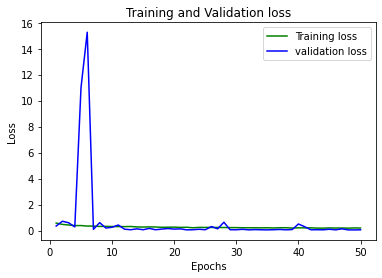

In [21]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

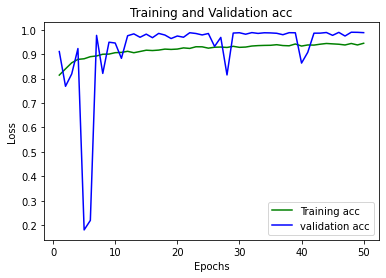

In [23]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model


In [ ]:
!ls

In [ ]:
model = load_model('ecgScratchEpoch2.hdf5')

In [ ]:
model.summary()